#### Importing the necessary libraries

In [298]:
from pyforest import *

import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

import xgboost as xgb


In [299]:
from sklearn.metrics import classification_report, f1_score

In [300]:
train= pd.read_csv("train_LZdllcl.csv")

train.head()

<IPython.core.display.Javascript object>

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [301]:
train.education.value_counts(), train.shape

(Bachelor's          36669
 Master's & above    14925
 Below Secondary       805
 Name: education, dtype: int64,
 (54808, 14))

In [302]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

#### changing the datatype of the education column as string

In [303]:
train["education"] = train['education'].astype(str)

In [304]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
nan                  2409
Below Secondary       805
Name: education, dtype: int64

#### removing nan from education

In [305]:
train.replace(to_replace =["nan"],
                            value ="Others", inplace=True)

In [306]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Others               2409
Below Secondary       805
Name: education, dtype: int64

#### Feature Engineering

In [307]:
label= LabelEncoder()

In [308]:
dept= label.fit_transform(train.department.values)

In [309]:
recruitment_channel_1= label.fit_transform(train.recruitment_channel)

In [310]:
region1= label.fit_transform(train.region)

In [311]:
education1= label.fit_transform(train.education)

In [312]:
gender1= label.fit_transform(train.gender)

In [313]:
train= train.drop(["department", "recruitment_channel", "region", "education", "gender"], axis=1)

In [314]:
train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


#### Adding the label encoded values

In [315]:
train["dept"]=  dept

train["recruitment_channel_1"]= recruitment_channel_1

train["region1"]= region1

train["education1"]= education1

train["gender1"]= gender1

In [316]:
train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,dept,recruitment_channel_1,region1,education1,gender1
0,65438,1,35,5.0,8,1,0,49,0,7,2,31,2,0
1,65141,1,30,5.0,4,0,0,60,0,4,0,14,0,1
2,7513,1,34,3.0,7,0,0,50,0,7,2,10,0,1
3,2542,2,39,1.0,10,0,0,50,0,7,0,15,0,1
4,48945,1,45,3.0,2,0,0,73,0,8,0,18,0,1


In [317]:
train["awards_won?"].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

#### Checking for nan values

In [318]:
train.isnull().sum()

employee_id                 0
no_of_trainings             0
age                         0
previous_year_rating     4124
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted                 0
dept                        0
recruitment_channel_1       0
region1                     0
education1                  0
gender1                     0
dtype: int64

#### plotting the various parameters with the target to see the fluctuations

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

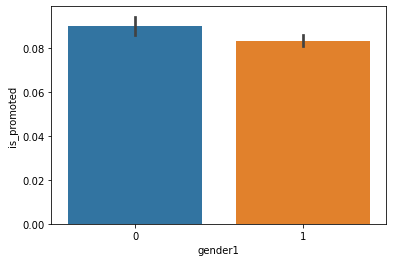

In [319]:
sns.barplot(x="gender1", y="is_promoted", data=train)

plt.show()

#### here we can see that females got promoted more as compared to males

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

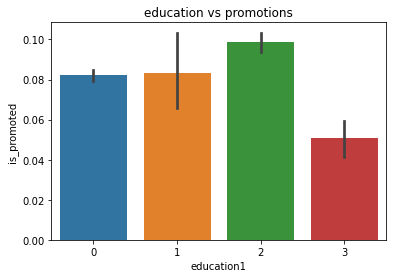

In [320]:
sns.barplot(x="education1", y="is_promoted", data=train)

plt.title("education vs promotions")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

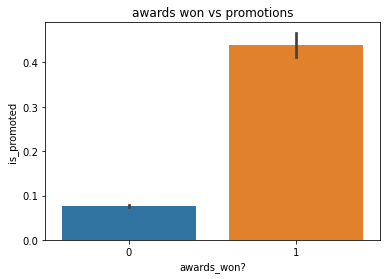

In [321]:
sns.barplot(x="awards_won?", y= "is_promoted", data=train)

plt.title("awards won vs promotions")

plt.show()

#### Above we can see that the person who have not won awards have received promotions the least

#### Checking the correlation with the target

In [322]:
corr=train.corr()

In [323]:
corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,dept,recruitment_channel_1,region1,education1,gender1
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206,-0.005187,0.005960,-0.003423,0.003332,-0.001542
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,0.014152,-0.010405,-0.004590,-0.044336,0.084501
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,0.079162,-0.011400,-0.088918,0.233830,-0.016293
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320,-0.143596,0.006135,-0.005002,-0.002265,-0.024232
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,0.059060,-0.002887,-0.058939,0.161002,-0.019675
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582,-0.088209,-0.000297,-0.007664,-0.018008,-0.037400
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871,-0.002151,-0.005510,0.000307,-0.001175,0.002381
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147,-0.251626,-0.002416,0.023572,-0.022174,-0.024494
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000,0.000130,0.002229,0.008841,0.009608,-0.011109
dept,-0.005187,0.014152,0.079162,-0.143596,0.059060,-0.088209,-0.002151,-0.251626,0.000130,1.000000,0.004732,-0.020592,0.068075,-0.030108


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

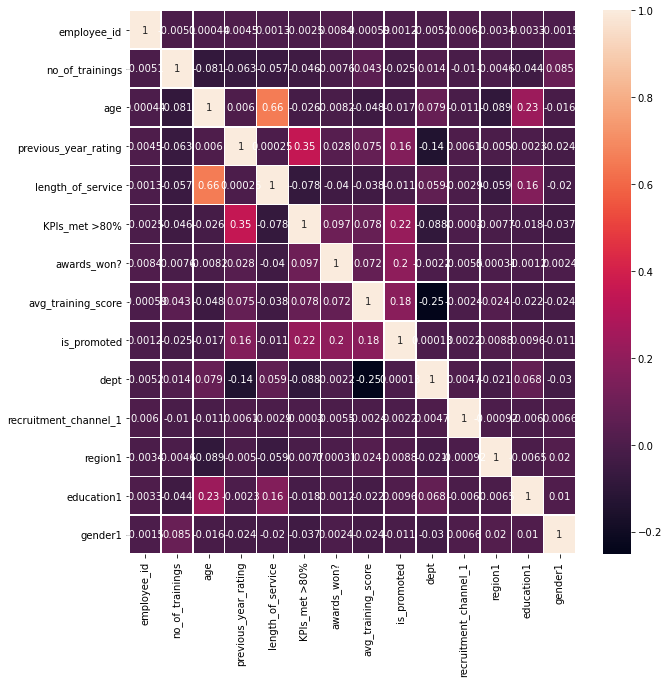

In [324]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

plt.show()

#### Dropping the negatively correlated values and our target variable that is promoted or not

In [325]:
train= train.drop(["employee_id"], axis=1)

In [326]:
train= train.drop("length_of_service", axis=1)

train= train.drop(["age", "gender1"], axis=1)

In [327]:
train.head()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,dept,recruitment_channel_1,region1,education1
0,1,5.0,1,0,49,0,7,2,31,2
1,1,5.0,0,0,60,0,4,0,14,0
2,1,3.0,0,0,50,0,7,2,10,0
3,2,1.0,0,0,50,0,7,0,15,0
4,1,3.0,0,0,73,0,8,0,18,0


#### getting our x and y

In [328]:
x= train.drop("is_promoted", axis=1)

y= train["is_promoted"]

In [329]:
x.shape, y.shape

((54808, 9), (54808,))

#### splitting into train and test and training the model

In [330]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=10)

In [331]:
x_train.shape, x_test.shape

((38365, 9), (16443, 9))

#### Parameters for XGBOOST

##### learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

##### max_depth: determines how deeply each tree is allowed to grow during any boosting round.

##### subsample: percentage of samples used per tree. Low value can lead to underfitting.

##### colsample_bytree: percentage of features used per tree. High value can lead to overfitting.

##### n_estimators: number of trees you want to build.

##### objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

##### XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

##### gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.

##### valpha: L1 regularization on leaf weights. A large value leads to more regularization.

##### lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [332]:
model= xgb.XGBClassifier(objective ='binary:logistic', n_estimators = 300, colsample_bytree = 0.6)

In [333]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [334]:
y_pred= model.predict(x_test)

In [335]:
model.score(x_test,y_test)

0.9385148695493523

##### Classification Report

In [336]:
classi=classification_report(y_test, y_pred)

In [344]:
classi

'              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97     15064\n           1       0.78      0.37      0.50      1379\n\n    accuracy                           0.94     16443\n   macro avg       0.86      0.68      0.74     16443\nweighted avg       0.93      0.94      0.93     16443\n'

##### f1 score

In [411]:
f1_score(y_test, y_pred)

0.5041687101520352

In [365]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Loading the test dataset

In [454]:
test= pd.read_csv("test_2umaH9m.csv")

test.head()

<IPython.core.display.Javascript object>

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [455]:
test.replace(to_replace =["nan"],
                            value ="Others", inplace=True)

In [456]:
test.education.isnull().sum()

1034

In [457]:
test.education.fillna("Others", axis=0, inplace=True)

In [458]:
dept= label.fit_transform(test.department.values)

recruitment_channel_1= label.fit_transform(test.recruitment_channel.values)

region1= label.fit_transform(test.region.values)

gender1= label.fit_transform(test.gender.values)

education1= label.fit_transform(test.education.values)

In [459]:
test= test.drop(["department", "employee_id", "region", "education", "gender", "recruitment_channel"], axis=1)

In [460]:
test["dept"]=  dept

test["recruitment_channel_1"]= recruitment_channel_1

test["region1"]= region1

test["education1"]= education1

test["gender1"]= gender1

In [461]:
test= test.drop(["age", "length_of_service"], axis=1)

In [462]:
test= test.drop("gender1", axis=1)

In [463]:
test.head()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,dept,recruitment_channel_1,region1,education1
0,1,NaN,1,0,77,8,2,18,0
1,1,3.0,0,0,51,2,0,28,0
2,1,1.0,0,0,47,7,0,4,0
3,3,2.0,0,0,65,5,0,11,0
4,1,4.0,0,0,61,1,2,21,0


In [465]:
test_pred= model.predict(test)

In [466]:
test_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [468]:
df2= pd.DataFrame(test_pred)

<IPython.core.display.Javascript object>

In [469]:
df2.head()

,0
0,0
1,0
2,0
3,0
4,0


In [470]:
df2.to_csv("submission.csv")